In [13]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [27]:
alabama = gpd.read_file('../data/geojson/alabama.geojson')
print(alabama.crs)
alabama.head()

epsg:4326


,geometry
0,"POLYGON ((-88.08014 35.00525, -88.21747 33.966..."


In [18]:
alabama_products = pd.read_csv('../data/excel/alabama_products.csv')
alabama_products.head(2)

,Website,Farms,Product,County,County Abbreviation,State,Latitude + Longitude,Latitude,Longitude
0,"BALDWIN,AL",7,Alfalfa,BALDWIN,BA,AL,"30.733056, -87.720278",30.733056,-87.720278
1,"BALDWIN,AL",173,Corn,BALDWIN,BA,AL,"30.733056, -87.720278",30.733056,-87.720278


In [26]:
alabama_products.geometry.to_crs('EPSG:4326')
print(alabama_products.crs)

AttributeError: 'DataFrame' object has no attribute 'geometry'

In [25]:
print(alabama_products.loc[0, 'geometry'])

KeyError: 'geometry'

<AxesSubplot:>

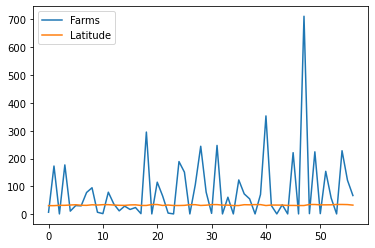

In [24]:
alabama_products.plot()

AttributeError: 'Line2D' object has no property 'column'

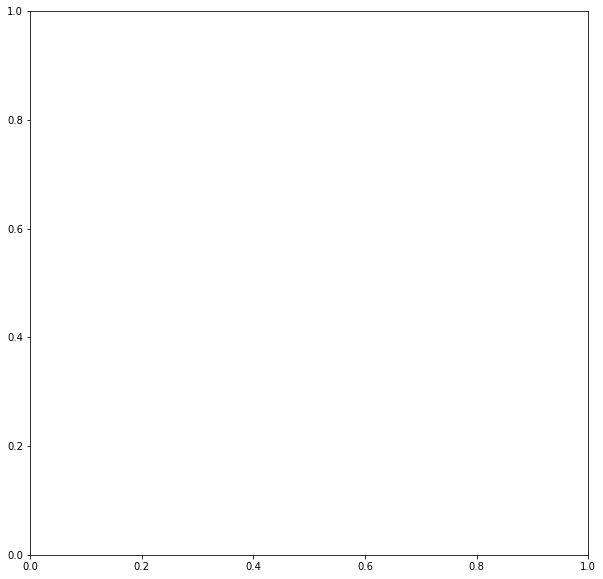

In [23]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

alabama_products.plot(column = 'County', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, #legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [20]:
alabama_products = alabama_products.dropna(subset = ['Latitude'])
area_center = (36.1627,-86.7816)
alabama_products_map = folium.Map(location =  area_center, zoom_start = 12)
marker_cluster = MarkerCluster().add_to(alabama_products_map)
for row_index, row_values in alabama_products.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    
    marker = folium.Marker(
        location = loc) 
 
    marker.add_to(marker_cluster)
alabama_products_map